In [76]:
!pip install umap-learn
import umap
import pandas as pd
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.pyplot as plt
import pickle


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [77]:
n_components=3

In [78]:
train_file = 'train_processed.csv'
test_file = 'test_processed.csv'
sample_data = pd.read_csv('sample_submission.csv')

if os.path.exists(train_file) and os.path.exists(test_file):
    train_data = pd.read_csv(train_file)
    test_data = pd.read_csv(test_file)
    print("Files loaded successfully.")
else:
    print("Please, run DataPreparing notebook!")

Files loaded successfully.


In [79]:
train_data['processed_text'] = train_data['processed_text'].fillna('')
test_data['processed_text'] = test_data['processed_text'].fillna('')
combined_series = pd.concat([train_data['processed_text'], test_data['processed_text']], ignore_index=True)
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_series)
train_tfidf = tfidf_matrix[:len(train_data)]
test_tfidf = tfidf_matrix[len(train_data):]

In [80]:
# import pickle

# with open('../src/models/Vectorizer.pkl','wb') as f:
#     pickle.dump(tfidf_vectorizer,f)

In [81]:
from scipy.sparse import vstack

combined_matrices = vstack((train_tfidf, test_tfidf))
combined_matrices

<223549x37061 sparse matrix of type '<class 'numpy.float64'>'
	with 7881805 stored elements in Compressed Sparse Row format>

In [82]:
svd_vectorization = TruncatedSVD(n_components=n_components)

vectorized_matrix = svd_vectorization.fit_transform(combined_matrices)

train_vector_svd = vectorized_matrix[:len(train_data)]
test_vector_svd = vectorized_matrix[len(train_data):]


print("Розміри train_vector_svd:", train_vector_svd.shape)
print("Розміри test_vector_svd:", test_vector_svd.shape)

train_vector_svd

Розміри train_vector_svd: (159571, 3)
Розміри test_vector_svd: (63978, 3)


array([[ 0.19861331, -0.0028975 ,  0.11754308],
       [ 0.05936731,  0.0108215 ,  0.03719281],
       [ 0.31967823, -0.01703995, -0.0083058 ],
       ...,
       [ 0.05001361, -0.01801562,  0.02018819],
       [ 0.3514156 , -0.03772251, -0.05884534],
       [ 0.17965293,  0.05754175, -0.12015916]])

In [83]:
# import pickle

# with open('../src/models/SVD.pkl','wb') as f:
#     pickle.dump(svd_vectorization,f)

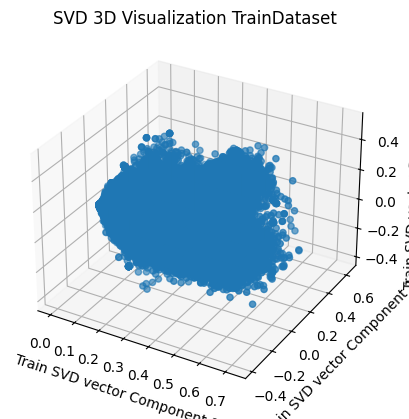

In [84]:
if n_components == 3:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(train_vector_svd[:, 0], train_vector_svd[:, 1], train_vector_svd[:, 2])
    
    ax.set_xlabel('Train SVD vector Component 1')
    ax.set_ylabel('Train SVD vector Component 2')
    ax.set_zlabel('Train SVD vector Component 3')
    
    plt.title("SVD 3D Visualization TrainDataset")
    plt.show()

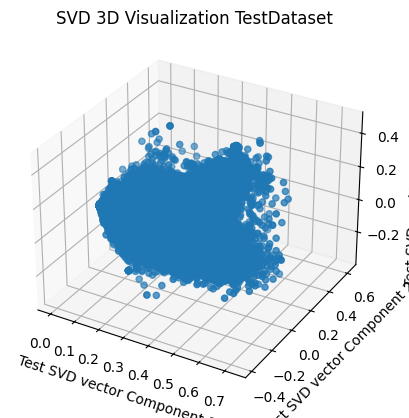

In [85]:
if n_components == 3:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(test_vector_svd[:, 0], test_vector_svd[:, 1], test_vector_svd[:, 2])
    
    ax.set_xlabel('Test SVD vector Component 1')
    ax.set_ylabel('Test SVD vector Component 2')
    ax.set_zlabel('Test SVD vector Component 3')
    
    plt.title("SVD 3D Visualization TestDataset")
    plt.show()

In [86]:
for i in range(n_components):
    train_data[f'svd_component_{i+1}'] = train_vector_svd[:, i]
for i in range(n_components):
    test_data[f'svd_component_{i+1}'] = test_vector_svd[:, i]

In [87]:
train_data = train_data.drop('processed_text', axis=1)
test_data = test_data.drop('processed_text', axis=1)

In [88]:
test_data = pd.merge(test_data, sample_data, on='id', how='left')

In [89]:
test_data.to_csv('test_ml.csv', index=False, mode='w')
train_data.to_csv('train_ml.csv', index=False, mode='w')